<a href="https://colab.research.google.com/github/FarrasNayan321/UASML/blob/main/UAS_ML_NO_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix, r2_score
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Read CSV

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FarrasNayan321/UASML/main/experiment.csv')
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F192,F193,F194,F195,F196,F197,F198,F199,F200,Class
0,0.006711,0.0,0.013423,0.006711,0.0,0.006711,0.006711,0.020134,0.020134,0.000000,...,0.013423,0.000000,0.006711,0.013423,0.020134,0.006711,0.0,0.006711,0.0,1
1,0.000000,0.0,0.000000,0.007246,0.0,0.000000,0.000000,0.021739,0.014493,0.000000,...,0.007246,0.007246,0.000000,0.000000,0.014493,0.000000,0.0,0.007246,0.0,1
2,0.011696,0.0,0.005848,0.000000,0.0,0.005848,0.000000,0.035088,0.017544,0.017544,...,0.005848,0.000000,0.005848,0.011696,0.035088,0.005848,0.0,0.000000,0.0,1
3,0.000000,0.0,0.020833,0.000000,0.0,0.000000,0.010417,0.000000,0.020833,0.000000,...,0.010417,0.000000,0.000000,0.041667,0.000000,0.000000,0.0,0.000000,0.0,1
4,0.000000,0.0,0.034483,0.000000,0.0,0.000000,0.000000,0.000000,0.034483,0.000000,...,0.017241,0.000000,0.000000,0.068966,0.000000,0.000000,0.0,0.000000,0.0,1


# Cari 8 Corellation tertinggi 

In [25]:
corr_mat = df.corr(method='pearson')
upper_corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool)).abs()
unique_corr_pairs = upper_corr_mat.unstack().dropna()
sorted_mat = unique_corr_pairs.sort_values()
sorted_mat['Class'].tail(6)

F80     0.164355
F12     0.164925
F65     0.185885
F200    0.188194
F122    0.203490
F157    0.214910
dtype: float64

In [4]:
df_new = df[["F157","F122","F200","F65","F12","F80","Class"]]

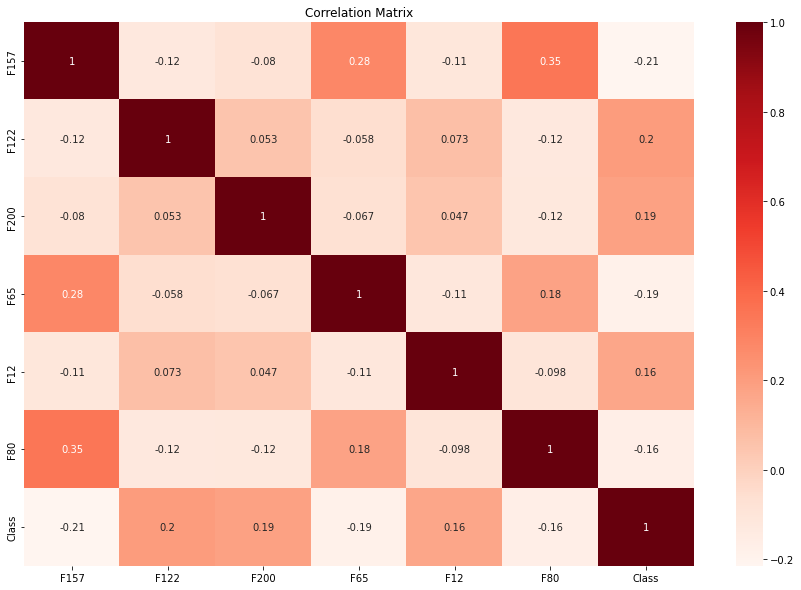

In [5]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=df_new.corr(), annot=True, cmap = "Reds")
plt.title("Correlation Matrix")

plt.show()

# Pake F157, F122, dan F200 dan drop sisanya

In [16]:
df1 = df_new.drop([ 'F65', 'F12', 'F80'], axis=1)

# Splitting Data

In [17]:
sc = StandardScaler()
X = df1.drop('Class',axis=1)
x_transformed = sc.fit_transform(X)
y = df1['Class']
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)



# KNN METHOD

In [18]:
def euclidean(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

In [19]:
class KNNClassificationEuclidian:
  def __init__(self, k):
    self.k = k
  
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test):
    y_pred = [self._predict(x_test) for x_test in X_test]
    return np.array(y_pred)

  def _predict(self, x_test):
    dist = [euclidean(x_test, x_train) for x_train in self.X_train]
    k_nearest = np.argsort(dist)[:self.k]
    k_nearest_class = [self.y_train[i] for i in k_nearest]
    most_common = Counter(k_nearest_class).most_common(1)
    return most_common[0][0]

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

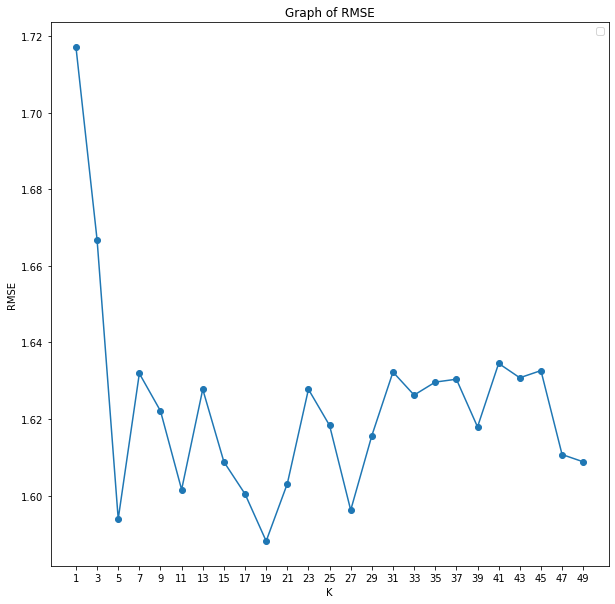

In [20]:
rmse_values = []
k_num = []
for k in range(1, 50, 2):
  model = KNNClassificationEuclidian(k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  k_num.append(k)
  rmse_values.append(np.sqrt(mean_squared_error(y_test, y_pred)))
plt.figure(figsize=(10, 10))
plt.plot(k_num, rmse_values, "o-")
plt.title("Graph of RMSE")
plt.xticks(np.arange(1, 50, 2.0))
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()
plt.show

In [21]:
model = KNNClassificationEuclidian(19)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.45465686274509803
1.5880991227028027


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.58      0.61      0.59       163
           2       0.36      0.65      0.46       163
           3       0.35      0.19      0.25       163
           4       0.55      0.65      0.59       164
           5       0.43      0.18      0.25       163

    accuracy                           0.45       816
   macro avg       0.45      0.45      0.43       816
weighted avg       0.45      0.45      0.43       816



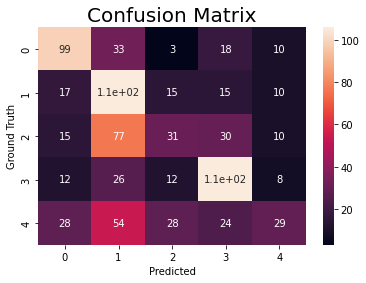

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.title("Confusion Matrix", fontsize=20)
plt.show()

In [30]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)


        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


In [36]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
nb_accur =accuracy_score(y_test, predictions)
print(nb_accur)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.4178921568627451
1.5880991227028027
